# 탐색적 데이터분석

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
df = pd.read_csv('TOTAL.csv')
df.head()

FileNotFoundError: [Errno 2] File TOTAL.csv does not exist: 'TOTAL.csv'

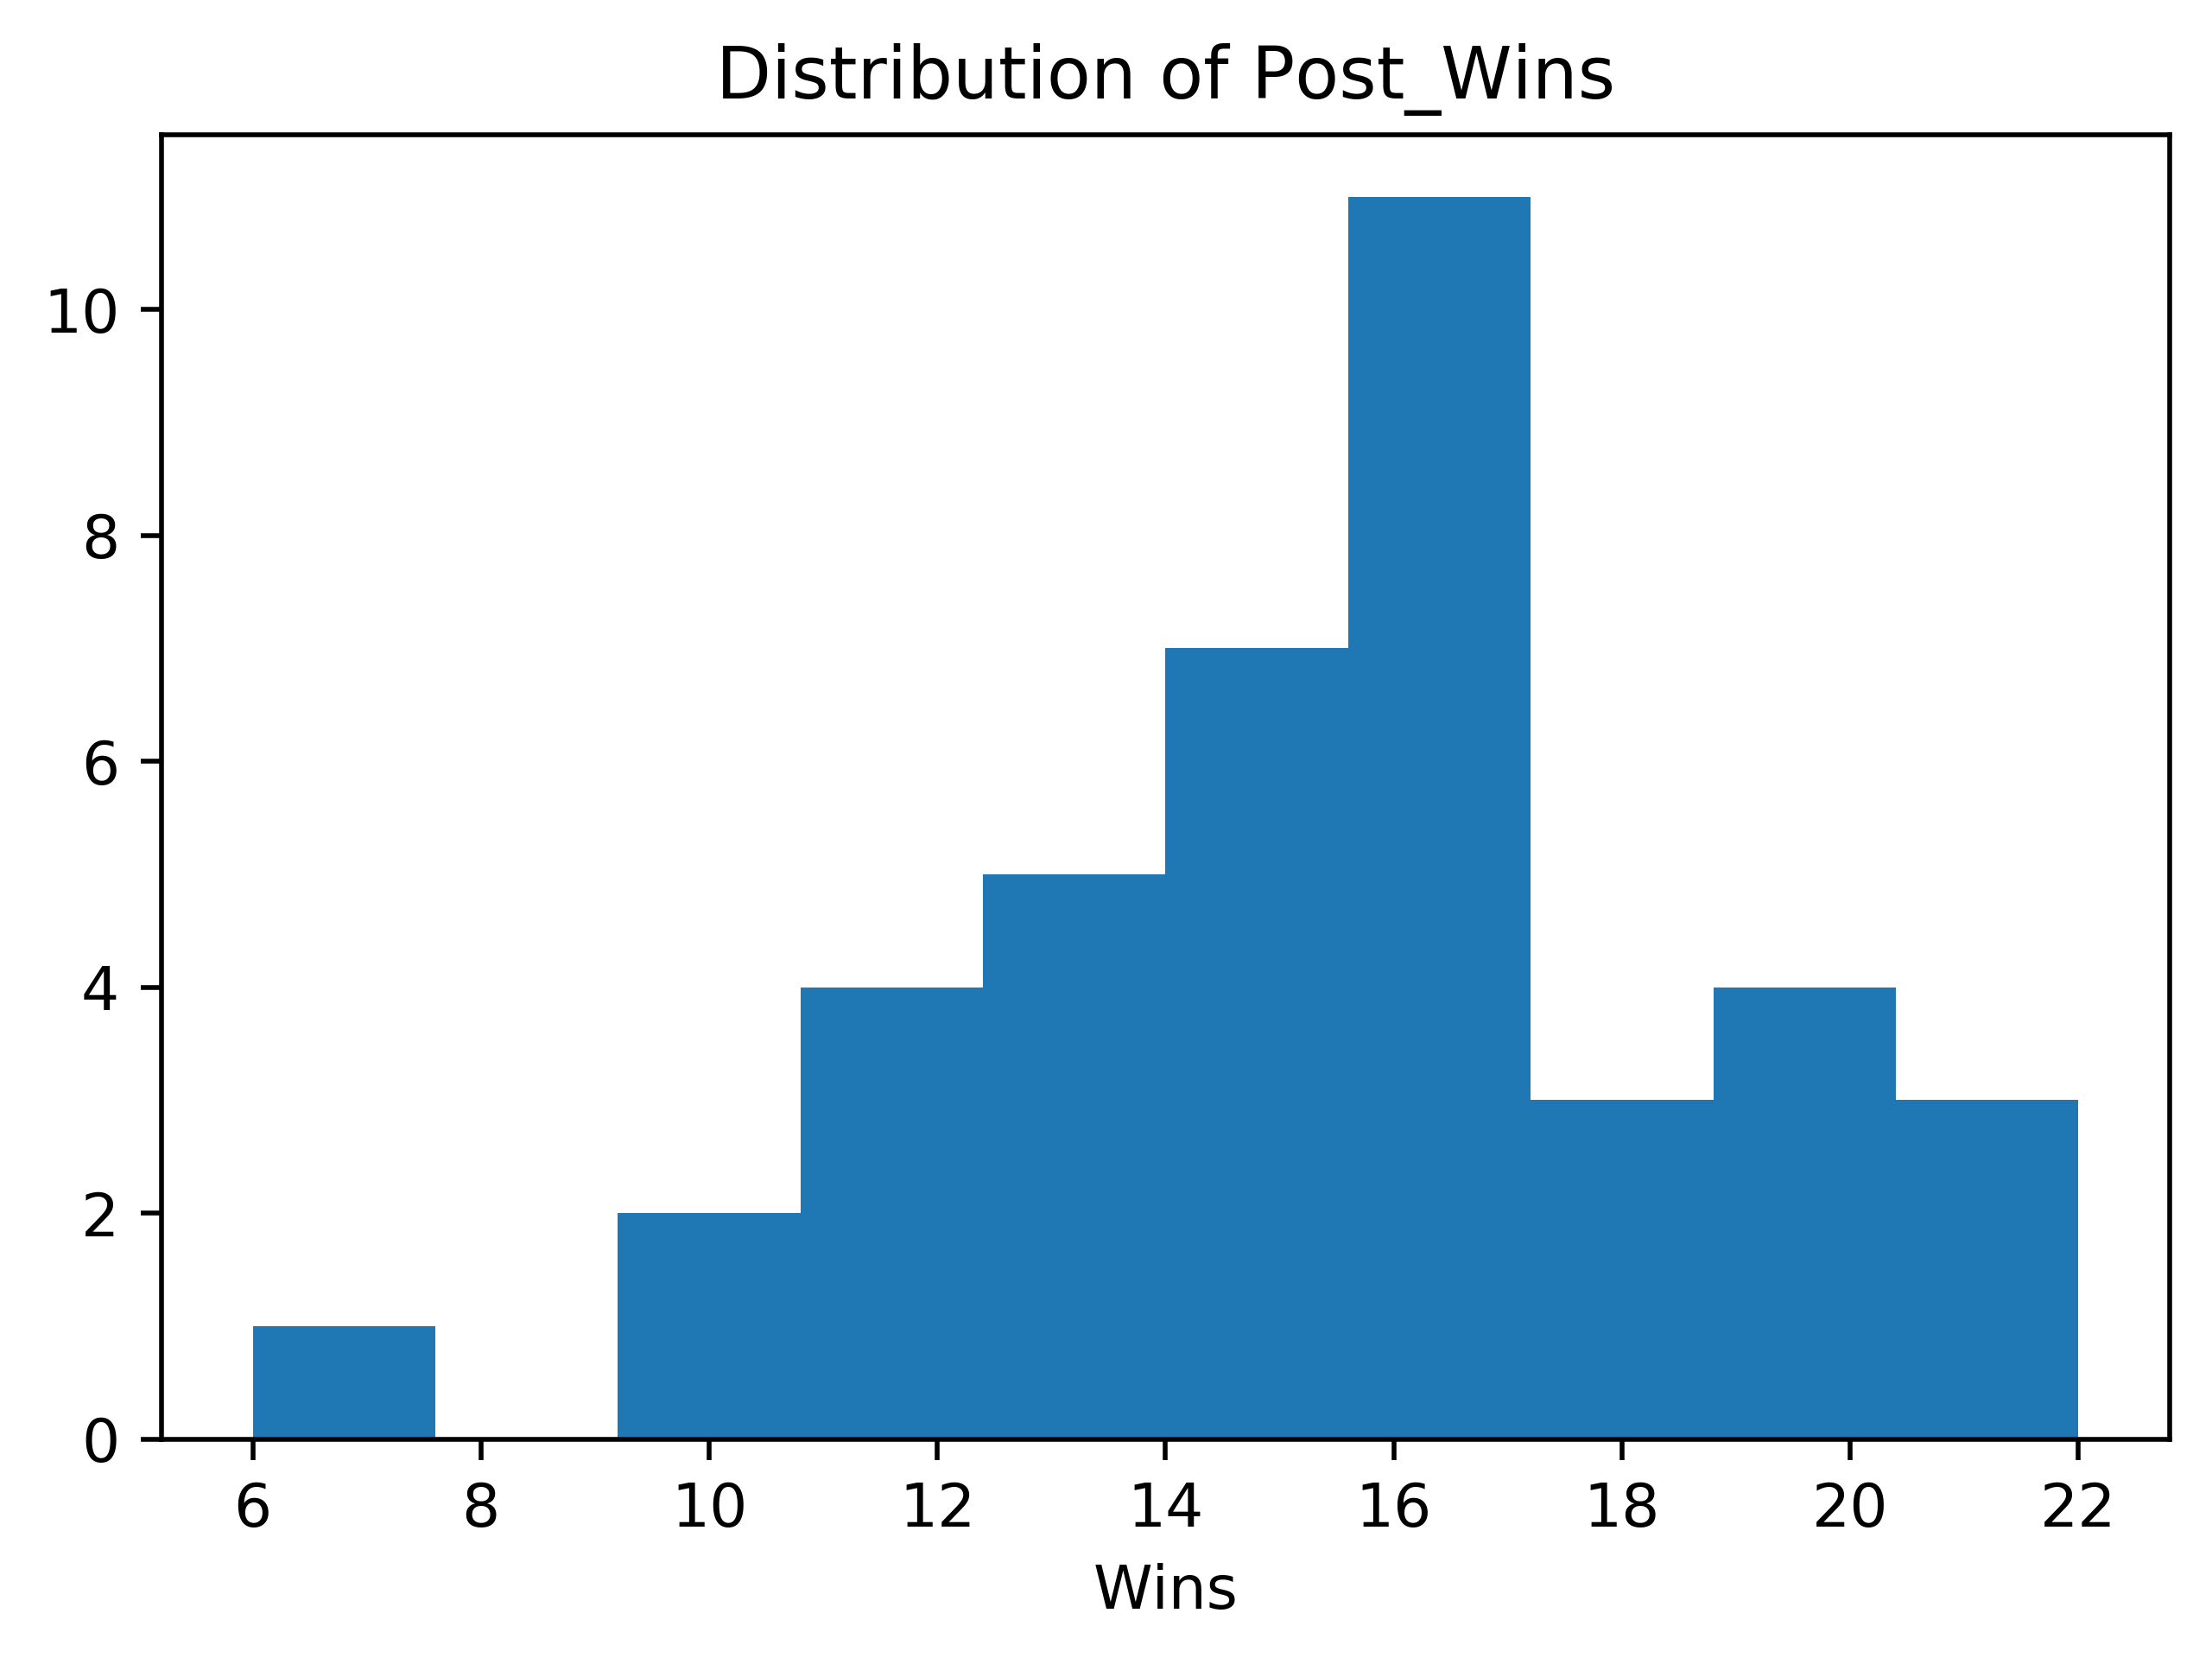

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=500)
plt.hist(df['Post_WLS'])
plt.xlabel('Wins')
plt.title('Distribution of Post_Wins')

plt.show()

In [4]:
df.corr()['Post_WLS']

CG_CK           4.821217e-03
HOLD            1.612854e-01
INN2            3.557600e-01
BF             -1.885287e-01
PA_P           -2.422075e-01
AB_P           -2.176376e-01
HIT_P          -2.773760e-01
H2_P           -1.361902e-01
H3_P           -1.626630e-01
HR_P           -2.499386e-01
SB_P           -8.735291e-02
CS_P           -2.054284e-02
SH_P           -1.201375e-01
SF_P           -2.987639e-01
BB_P           -1.151150e-01
IB_P            7.443752e-18
HP_P            1.052240e-02
KK_P           -9.600412e-02
GD_P            1.325288e-01
WP_P           -3.180744e-01
BK_P           -1.933063e-02
ERR_P           1.113108e-01
R_P            -3.714275e-01
ER_P           -3.311528e-01
P_WHIP_RT_P    -2.629804e-01
P2_WHIP_RT_P   -3.041531e-01
CB_WHIP_RT_P   -3.398156e-01
PA_B            4.113489e-01
AB_B            2.436915e-01
RBI_B           4.621337e-01
RUN_B           4.535491e-01
HIT_B           3.503144e-01
H2_B            2.633613e-01
H3_B            1.351129e-01
HR_B          

In [5]:
count=1
plt.figure(figsize=(35,35), dpi=500)
for item in list(df.columns):
    if item!='Post_WLS':
        plt.subplot(7, 7, count)
        plt.xlabel(item)
        plt.ylabel('Post_WLS')
        plt.scatter(df[item], df['Post_WLS'])
    count += 1

# Data Split

In [6]:
x_data = df.values[:, 0:49]
x_data

array([[1.00000000e+00, 4.30000000e+01, 3.02600000e+03, ...,
        2.64122748e+01, 9.92000000e+02, 2.65000000e+02],
       [1.00000000e+00, 3.60000000e+01, 3.00300000e+03, ...,
        2.72993758e+01, 1.02700000e+03, 2.66000000e+02],
       [1.00000000e+00, 5.00000000e+01, 3.01300000e+03, ...,
        2.91671862e+01, 1.01100000e+03, 2.75000000e+02],
       ...,
       [0.00000000e+00, 4.20000000e+01, 3.01300000e+03, ...,
        3.31988762e+01, 1.11000000e+03, 3.48000000e+02],
       [2.00000000e+00, 4.10000000e+01, 3.01600000e+03, ...,
        3.12065313e+01, 1.13600000e+03, 3.43000000e+02],
       [1.00000000e+00, 3.70000000e+01, 3.00700000e+03, ...,
        2.82146001e+01, 1.00000000e+03, 2.70000000e+02]])

In [7]:
y_data = df.values[:, [49]]
y_data

array([[18.],
       [ 6.],
       [21.],
       [15.],
       [17.],
       [19.],
       [13.],
       [17.],
       [13.],
       [14.],
       [14.],
       [16.],
       [20.],
       [15.],
       [12.],
       [18.],
       [17.],
       [12.],
       [15.],
       [16.],
       [12.],
       [22.],
       [19.],
       [13.],
       [14.],
       [11.],
       [18.],
       [16.],
       [10.],
       [20.],
       [17.],
       [15.],
       [21.],
       [17.],
       [10.],
       [13.],
       [16.],
       [16.],
       [16.],
       [13.]])

# Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
x_data = scaler.fit_transform(x_data)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36, 49), (36, 1), (4, 49), (4, 1))

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[-1.32814842e+00  2.02098885e-01  1.27071006e+00 -4.47862023e+00
   2.18203344e+00  2.27940003e+00  1.40939733e+00  3.25911753e-01
   8.74054797e-01 -3.96982583e+00 -1.91175991e+00 -6.67340244e-01
  -2.17722374e+00 -2.80244024e+00  2.26952684e+00  2.27012635e+00
  -4.80303789e-01  1.38376913e+00  1.83566669e+00  5.81185580e-01
   1.76446907e+00  1.40496934e+00 -8.62235579e-01  1.30983840e+00
  -1.63383975e+00 -1.25471541e+00  1.46940741e+00  1.34342204e+00
   5.24271081e-01 -3.44451037e-03  4.98845433e-01 -9.77049581e-01
   1.22914379e+00 -2.78100499e+00 -1.45557122e-01  2.78515500e+00
  -6.06331351e-01  3.40061901e+00 -1.05949593e+00  1.54515738e+00
  -2.23277526e-01 -1.05854420e+00 -2.91699734e+00  2.57238439e+00
   2.96388599e-01 -2.40239060e+00  1.85446415e+00  1.47813282e+00
  -2.37483700e+00]]
절편: [15.96465168]
훈련 정확도:1.00000
테스트 정확도:-34.61640


In [12]:
y_predict = lr.predict(X_test)

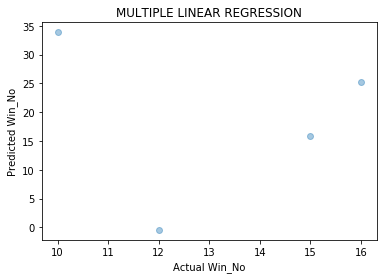

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Win_No")
plt.ylabel("Predicted Win_No")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

# DNN 구성

In [14]:
%%time

model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(49,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

hist = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), shuffle=True)

Train on 36 samples, validate on 4 samples
Epoch 1/100
36/36 [==============================] - 3s 74ms/sample - loss: 141.9221 - mae: 11.0899 - val_loss: 13.3036 - val_mae: 3.3206
Epoch 2/100
36/36 [==============================] - 0s 7ms/sample - loss: 14.5781 - mae: 2.8276 - val_loss: 11.2729 - val_mae: 2.8520
Epoch 3/100
36/36 [==============================] - 0s 6ms/sample - loss: 8.0011 - mae: 2.1705 - val_loss: 11.5276 - val_mae: 2.9883
Epoch 4/100
36/36 [==============================] - 0s 10ms/sample - loss: 3.1362 - mae: 1.3913 - val_loss: 28.0126 - val_mae: 4.8078
Epoch 5/100
36/36 [==============================] - 0s 11ms/sample - loss: 2.4961 - mae: 1.2635 - val_loss: 8.8188 - val_mae: 2.8259
Epoch 6/100
36/36 [==============================] - 0s 11ms/sample - loss: 1.9222 - mae: 1.0888 - val_loss: 16.0581 - val_mae: 3.4207
Epoch 7/100
36/36 [==============================] - 0s 12ms/sample - loss: 3.2605 - mae: 1.4872 - val_loss: 17.9777 - val_mae: 3.7200
Epoch 8/100

# 하이퍼파라미터 튜닝

In [15]:
import numpy as np

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[49]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
    return model

In [18]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [19]:
%%time
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 36 samples, validate on 4 samples
Epoch 1/100
36/36 [==============================] - 1s 19ms/sample - loss: 217.9276 - mae: 14.3739 - val_loss: 135.4162 - val_mae: 11.3349
Epoch 2/100
36/36 [==============================] - 0s 997us/sample - loss: 173.7686 - mae: 12.7769 - val_loss: 113.3053 - val_mae: 10.2525
Epoch 3/100
36/36 [==============================] - 0s 1ms/sample - loss: 135.6271 - mae: 11.1484 - val_loss: 89.1927 - val_mae: 8.9548
Epoch 4/100
36/36 [==============================] - 0s 1ms/sample - loss: 96.6514 - mae: 9.1906 - val_loss: 63.3541 - val_mae: 7.4033
Epoch 5/100
36/36 [==============================] - 0s 1ms/sample - loss: 65.5570 - mae: 7.2953 - val_loss: 48.3552 - val_mae: 5.8205
Epoch 6/100
36/36 [==============================] - 0s 1ms/sample - loss: 44.6986 - mae: 5.8241 - val_loss: 36.1850 - val_mae: 5.0649
Epoch 7/100
36/36 [==============================] - 0s 1ms/sample - loss: 30.8932 - mae: 4.5873 - val_loss: 27.3638 - val_mae: 4.6829

In [20]:
mse_test = keras_reg.score(X_test, y_test)

4/4 [==============================] - 0s 2ms/sample - loss: 8.7597 - mae: 2.6007


In [21]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 1s 27ms/sample - loss: 237.1270 - mae: 15.0942 - val_loss: 164.9686 - val_mae: 12.4951
Epoch 2/100
24/24 [==============================] - 0s 1ms/sample - loss: 234.2897 - mae: 15.0055 - val_loss: 163.9288 - val_mae: 12.4559
Epoch 3/100
24/24 [==============================] - 0s 1ms/sample - loss: 231.5196 - mae: 14.9177 - val_loss: 162.9363 - val_mae: 12.4179
Epoch 4/100
24/24 [==============================] - 0s 1ms/sample - loss: 228.8134 - mae: 14.8308 - val_loss: 161.9884 - val_mae: 12.3811
Epoch 5/100
24/24 [==============================] - 0s 1ms/sample - loss: 226.1682 - mae: 14.7447 - val_loss: 161.0828 - val_mae: 12.3455
Epoch 6/100
24/24 [==============================] - 0s 1ms/sample - loss: 223.5811 - mae: 14.6595 - val_loss: 160.2173 - val_mae: 12.3111
Epoch 7/100
24/24 [==============================] - 0s 1ms/sample - loss: 221.0497 - mae: 14.5751 - val_loss: 159.3897 - 

Epoch 60/100
24/24 [==============================] - 0s 1ms/sample - loss: 131.9798 - mae: 11.0072 - val_loss: 140.4340 - val_mae: 11.4055
Epoch 61/100
24/24 [==============================] - 0s 2ms/sample - loss: 130.8214 - mae: 10.9529 - val_loss: 140.2649 - val_mae: 11.3980
Epoch 62/100
24/24 [==============================] - 0s 2ms/sample - loss: 129.6759 - mae: 10.8990 - val_loss: 140.0978 - val_mae: 11.3906
Epoch 63/100
24/24 [==============================] - 0s 2ms/sample - loss: 128.5431 - mae: 10.8454 - val_loss: 139.9326 - val_mae: 11.3834
Epoch 64/100
24/24 [==============================] - 0s 2ms/sample - loss: 127.4229 - mae: 10.7923 - val_loss: 139.7693 - val_mae: 11.3763
Epoch 65/100
24/24 [==============================] - 0s 2ms/sample - loss: 126.3150 - mae: 10.7394 - val_loss: 139.6076 - val_mae: 11.3693
Epoch 66/100
24/24 [==============================] - 0s 1ms/sample - loss: 125.2194 - mae: 10.6870 - val_loss: 139.4476 - val_mae: 11.3625
Epoch 67/100
24/24 [

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


24/24 [==============================] - 1s 22ms/sample - loss: 257.0242 - mae: 15.5867 - val_loss: 165.8887 - val_mae: 12.7496
Epoch 2/100
24/24 [==============================] - 0s 870us/sample - loss: 254.0931 - mae: 15.5065 - val_loss: 166.3954 - val_mae: 12.7829
Epoch 3/100
24/24 [==============================] - 0s 999us/sample - loss: 251.2459 - mae: 15.4273 - val_loss: 166.8711 - val_mae: 12.8137
Epoch 4/100
24/24 [==============================] - 0s 1ms/sample - loss: 248.4776 - mae: 15.3490 - val_loss: 167.3154 - val_mae: 12.8421
Epoch 5/100
24/24 [==============================] - 0s 1ms/sample - loss: 245.7834 - mae: 15.2716 - val_loss: 167.7281 - val_mae: 12.8681
Epoch 6/100
24/24 [==============================] - 0s 1ms/sample - loss: 243.1592 - mae: 15.1951 - val_loss: 168.1090 - val_mae: 12.8919
Epoch 7/100
24/24 [==============================] - 0s 1ms/sample - loss: 240.6008 - mae: 15.1194 - val_loss: 168.4580 - val_mae: 12.9136
Epoch 8/100
24/24 [===============

Epoch 34/100
24/24 [==============================] - 0s 2ms/sample - loss: 53.3018 - mae: 6.4821 - val_loss: 138.2886 - val_mae: 11.3554
Epoch 35/100
24/24 [==============================] - 0s 1ms/sample - loss: 51.3926 - mae: 6.3412 - val_loss: 137.2360 - val_mae: 11.3160
Epoch 36/100
24/24 [==============================] - 0s 2ms/sample - loss: 49.5678 - mae: 6.2040 - val_loss: 136.1872 - val_mae: 11.2765
Epoch 37/100
24/24 [==============================] - 0s 2ms/sample - loss: 47.8232 - mae: 6.0705 - val_loss: 135.1427 - val_mae: 11.2370
Epoch 38/100
24/24 [==============================] - 0s 1ms/sample - loss: 46.1548 - mae: 5.9404 - val_loss: 134.1027 - val_mae: 11.1974
Epoch 39/100
24/24 [==============================] - 0s 2ms/sample - loss: 44.5588 - mae: 5.8138 - val_loss: 133.0676 - val_mae: 11.1578
Epoch 40/100
24/24 [==============================] - 0s 1ms/sample - loss: 43.0316 - mae: 5.6904 - val_loss: 132.0379 - val_mae: 11.1182
Epoch 41/100
24/24 [==============

Epoch 94/100
24/24 [==============================] - 0s 1ms/sample - loss: 10.1936 - mae: 2.6250 - val_loss: 88.5716 - val_mae: 9.1989
Epoch 95/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.9991 - mae: 2.5989 - val_loss: 87.9971 - val_mae: 9.1699
Epoch 96/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.8106 - mae: 2.5732 - val_loss: 87.4298 - val_mae: 9.1411
Epoch 97/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.6278 - mae: 2.5479 - val_loss: 86.8696 - val_mae: 9.1126
Epoch 98/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.4504 - mae: 2.5230 - val_loss: 86.3164 - val_mae: 9.0843
Epoch 99/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.2783 - mae: 2.4984 - val_loss: 85.7701 - val_mae: 9.0562
Epoch 100/100
12/12 [==============================] - 0s 749us/sample - loss: 158.5078 - mae: 11.6720
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   4.4s
[CV]

Epoch 52/100
24/24 [==============================] - 0s 2ms/sample - loss: 33.6712 - mae: 5.3689 - val_loss: 69.0624 - val_mae: 7.9490
Epoch 53/100
24/24 [==============================] - 0s 1ms/sample - loss: 32.5546 - mae: 5.2776 - val_loss: 67.7894 - val_mae: 7.8609
Epoch 54/100
24/24 [==============================] - 0s 1ms/sample - loss: 31.4815 - mae: 5.1881 - val_loss: 66.5549 - val_mae: 7.7742
Epoch 55/100
24/24 [==============================] - 0s 1ms/sample - loss: 30.4500 - mae: 5.1005 - val_loss: 65.3577 - val_mae: 7.6888
Epoch 56/100
24/24 [==============================] - 0s 1ms/sample - loss: 29.4583 - mae: 5.0146 - val_loss: 64.1968 - val_mae: 7.6048
Epoch 57/100
24/24 [==============================] - 0s 1ms/sample - loss: 28.5047 - mae: 4.9305 - val_loss: 63.0713 - val_mae: 7.5221
Epoch 58/100
24/24 [==============================] - 0s 1ms/sample - loss: 27.5877 - mae: 4.8480 - val_loss: 61.9801 - val_mae: 7.4407
Epoch 59/100
24/24 [============================

Epoch 10/100
24/24 [==============================] - 0s 994us/sample - loss: 155.6126 - mae: 11.8917 - val_loss: 289.0438 - val_mae: 16.1949
Epoch 11/100
12/12 [==============================] - 0s 807us/sample - loss: 237.3122 - mae: 14.7845
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   1.2s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 1s 29ms/sample - loss: 248.4152 - mae: 15.5525 - val_loss: 190.0306 - val_mae: 13.6278
Epoch 2/100
24/24 [==============================] - 0s 951us/sample - loss: 235.8338 - mae: 15.1469 - val_loss: 180.4548 - val_mae: 13.2605
Epoch 3/100
24/24 [==============================] - 0s 918us/sample - loss: 224.3384 - mae: 14.7659 - val_loss: 171.4615 - val_mae: 12.9055
Epoch 4/100
24/24 [==============================] - 0s 1ms/sample - loss: 213.4948 - mae: 14.3970 - val_loss: 162.9437 - val_mae: 12.5592

Epoch 57/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.5075 - mae: 1.3630 - val_loss: 10.6201 - val_mae: 3.0177
Epoch 58/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.4273 - mae: 1.3435 - val_loss: 10.5018 - val_mae: 3.0022
Epoch 59/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.3500 - mae: 1.3243 - val_loss: 10.3934 - val_mae: 2.9880
Epoch 60/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.2761 - mae: 1.3053 - val_loss: 10.2851 - val_mae: 2.9735
Epoch 61/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.2048 - mae: 1.2867 - val_loss: 10.1867 - val_mae: 2.9604
Epoch 62/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.1367 - mae: 1.2683 - val_loss: 10.0895 - val_mae: 2.9472
Epoch 63/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.0707 - mae: 1.2503 - val_loss: 9.9993 - val_mae: 2.9349
Epoch 64/100
24/24 [==============================] - 0s

Epoch 16/100
24/24 [==============================] - 0s 1ms/sample - loss: 85.8176 - mae: 8.5688 - val_loss: 52.6051 - val_mae: 6.2311
Epoch 17/100
24/24 [==============================] - 0s 1ms/sample - loss: 75.6562 - mae: 7.9773 - val_loss: 46.3733 - val_mae: 5.6554
Epoch 18/100
24/24 [==============================] - 0s 2ms/sample - loss: 66.3115 - mae: 7.3844 - val_loss: 40.8647 - val_mae: 5.0904
Epoch 19/100
24/24 [==============================] - 0s 1ms/sample - loss: 57.8622 - mae: 6.7958 - val_loss: 36.0922 - val_mae: 4.5592
Epoch 20/100
24/24 [==============================] - 0s 1ms/sample - loss: 50.3841 - mae: 6.2292 - val_loss: 32.0224 - val_mae: 4.3200
Epoch 21/100
24/24 [==============================] - 0s 1ms/sample - loss: 43.8570 - mae: 5.7375 - val_loss: 28.6572 - val_mae: 4.0899
Epoch 22/100
24/24 [==============================] - 0s 2ms/sample - loss: 38.2642 - mae: 5.2668 - val_loss: 25.9425 - val_mae: 3.8721
Epoch 23/100
24/24 [============================

Epoch 77/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.0000 - mae: 1.0298 - val_loss: 12.5344 - val_mae: 3.3602
Epoch 78/100
24/24 [==============================] - 0s 1ms/sample - loss: 1.9232 - mae: 1.0121 - val_loss: 12.4949 - val_mae: 3.3558
Epoch 79/100
24/24 [==============================] - 0s 1ms/sample - loss: 1.8496 - mae: 0.9946 - val_loss: 12.4537 - val_mae: 3.3509
Epoch 80/100
24/24 [==============================] - 0s 961us/sample - loss: 1.7790 - mae: 0.9775 - val_loss: 12.4168 - val_mae: 3.3467
Epoch 81/100
24/24 [==============================] - 0s 1ms/sample - loss: 1.7114 - mae: 0.9606 - val_loss: 12.3795 - val_mae: 3.3422
Epoch 82/100
24/24 [==============================] - 0s 970us/sample - loss: 1.6465 - mae: 0.9441 - val_loss: 12.3438 - val_mae: 3.3378
Epoch 83/100
24/24 [==============================] - 0s 1ms/sample - loss: 1.5846 - mae: 0.9280 - val_loss: 12.3099 - val_mae: 3.3337
Epoch 84/100
24/24 [==============================]

Epoch 35/100
24/24 [==============================] - 0s 2ms/sample - loss: 10.5402 - mae: 2.5931 - val_loss: 9.7570 - val_mae: 2.6074
Epoch 36/100
24/24 [==============================] - 0s 2ms/sample - loss: 10.0776 - mae: 2.5149 - val_loss: 9.6444 - val_mae: 2.5761
Epoch 37/100
24/24 [==============================] - 0s 2ms/sample - loss: 9.6523 - mae: 2.4505 - val_loss: 9.5590 - val_mae: 2.5487
Epoch 38/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.2577 - mae: 2.3903 - val_loss: 9.4956 - val_mae: 2.5249
Epoch 39/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.8890 - mae: 2.3335 - val_loss: 9.4482 - val_mae: 2.5039
Epoch 40/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.5429 - mae: 2.2850 - val_loss: 9.4110 - val_mae: 2.4848
Epoch 41/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.2168 - mae: 2.2387 - val_loss: 9.3901 - val_mae: 2.4686
Epoch 42/100
24/24 [==============================] - 0s 1ms

Epoch 39/100
24/24 [==============================] - 0s 1ms/sample - loss: 20.8486 - mae: 3.8424 - val_loss: 16.6229 - val_mae: 3.6217
Epoch 40/100
24/24 [==============================] - 0s 1ms/sample - loss: 18.9176 - mae: 3.6299 - val_loss: 15.8258 - val_mae: 3.5820
Epoch 41/100
24/24 [==============================] - 0s 1ms/sample - loss: 17.3148 - mae: 3.4486 - val_loss: 15.1828 - val_mae: 3.5379
Epoch 42/100
24/24 [==============================] - 0s 1ms/sample - loss: 15.9700 - mae: 3.2806 - val_loss: 14.6575 - val_mae: 3.4909
Epoch 43/100
24/24 [==============================] - 0s 1ms/sample - loss: 14.8257 - mae: 3.1407 - val_loss: 14.2307 - val_mae: 3.4426
Epoch 44/100
24/24 [==============================] - 0s 1ms/sample - loss: 13.8297 - mae: 3.0289 - val_loss: 13.8631 - val_mae: 3.3942
Epoch 45/100
24/24 [==============================] - 0s 1ms/sample - loss: 12.9582 - mae: 2.9284 - val_loss: 13.5601 - val_mae: 3.3513
Epoch 46/100
24/24 [============================

Epoch 100/100
12/12 [==============================] - 0s 749us/sample - loss: 44.5084 - mae: 6.2319
[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=   4.9s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 1s 30ms/sample - loss: 252.6382 - mae: 15.4130 - val_loss: 168.9857 - val_mae: 12.7215
Epoch 2/100
24/24 [==============================] - 0s 1ms/sample - loss: 250.0781 - mae: 15.3278 - val_loss: 166.5189 - val_mae: 12.6119
Epoch 3/100
24/24 [==============================] - 0s 1ms/sample - loss: 247.5046 - mae: 15.2415 - val_loss: 164.0225 - val_mae: 12.4996
Epoch 4/100
24/24 [==============================] - 0s 1ms/sample - loss: 244.8916 - mae: 15.1532 - val_loss: 161.4936 - val_mae: 12.3843
Epoch 5/100
24/24 [==============================] - 0s 1ms/sample - loss: 242.2132 - mae: 15.0621 - val_loss: 158.8936 - val_mae: 12.2642
Epoch 

Epoch 9/100
24/24 [==============================] - 0s 1ms/sample - loss: 243.2460 - mae: 15.2346 - val_loss: 153.7184 - val_mae: 12.1900
Epoch 10/100
24/24 [==============================] - 0s 1ms/sample - loss: 238.1568 - mae: 15.0692 - val_loss: 150.6133 - val_mae: 12.0685
Epoch 11/100
24/24 [==============================] - 0s 1ms/sample - loss: 232.6933 - mae: 14.8892 - val_loss: 147.3380 - val_mae: 11.9391
Epoch 12/100
24/24 [==============================] - 0s 1ms/sample - loss: 226.8028 - mae: 14.6926 - val_loss: 143.8408 - val_mae: 11.7993
Epoch 13/100
24/24 [==============================] - 0s 1ms/sample - loss: 220.3887 - mae: 14.4752 - val_loss: 140.0893 - val_mae: 11.6478
Epoch 14/100
24/24 [==============================] - 0s 1ms/sample - loss: 213.3983 - mae: 14.2339 - val_loss: 136.0528 - val_mae: 11.4827
Epoch 15/100
24/24 [==============================] - 0s 1ms/sample - loss: 205.7241 - mae: 13.9635 - val_loss: 131.6697 - val_mae: 11.2997
Epoch 16/100
24/24 [=

Epoch 70/100
24/24 [==============================] - 0s 1ms/sample - loss: 3.4256 - mae: 1.4003 - val_loss: 3.9963 - val_mae: 1.5053
Epoch 71/100
24/24 [==============================] - 0s 1ms/sample - loss: 3.2724 - mae: 1.3680 - val_loss: 3.9473 - val_mae: 1.5111
Epoch 72/100
24/24 [==============================] - 0s 1ms/sample - loss: 3.1237 - mae: 1.3368 - val_loss: 3.9095 - val_mae: 1.5175
Epoch 73/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.9836 - mae: 1.3060 - val_loss: 3.8727 - val_mae: 1.5228
Epoch 74/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.8541 - mae: 1.2767 - val_loss: 3.8226 - val_mae: 1.5250
Epoch 75/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.7344 - mae: 1.2494 - val_loss: 3.7884 - val_mae: 1.5285
Epoch 76/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.6165 - mae: 1.2214 - val_loss: 3.7546 - val_mae: 1.5310
Epoch 77/100
24/24 [==============================] - 0s 1ms/s

Epoch 28/100
24/24 [==============================] - 0s 1ms/sample - loss: 93.1124 - mae: 9.0337 - val_loss: 144.0600 - val_mae: 11.5021
Epoch 29/100
24/24 [==============================] - 0s 1ms/sample - loss: 90.4629 - mae: 8.8845 - val_loss: 143.4634 - val_mae: 11.4781
Epoch 30/100
24/24 [==============================] - 0s 1ms/sample - loss: 87.9078 - mae: 8.7386 - val_loss: 142.8674 - val_mae: 11.4546
Epoch 31/100
24/24 [==============================] - 0s 1ms/sample - loss: 85.4432 - mae: 8.5958 - val_loss: 142.2714 - val_mae: 11.4316
Epoch 32/100
24/24 [==============================] - 0s 1ms/sample - loss: 83.0650 - mae: 8.4560 - val_loss: 141.6748 - val_mae: 11.4090
Epoch 33/100
24/24 [==============================] - 0s 997us/sample - loss: 80.7696 - mae: 8.3192 - val_loss: 141.0773 - val_mae: 11.3866
Epoch 34/100
24/24 [==============================] - 0s 2ms/sample - loss: 78.5536 - mae: 8.1853 - val_loss: 140.4786 - val_mae: 11.3645
Epoch 35/100
24/24 [============

Epoch 88/100
24/24 [==============================] - 0s 1ms/sample - loss: 22.5390 - mae: 3.9402 - val_loss: 108.2508 - val_mae: 10.1477
Epoch 89/100
24/24 [==============================] - 0s 1ms/sample - loss: 22.1177 - mae: 3.9002 - val_loss: 107.7117 - val_mae: 10.1247
Epoch 90/100
24/24 [==============================] - 0s 1ms/sample - loss: 21.7073 - mae: 3.8608 - val_loss: 107.1760 - val_mae: 10.1017
Epoch 91/100
24/24 [==============================] - 0s 1ms/sample - loss: 21.3076 - mae: 3.8219 - val_loss: 106.6437 - val_mae: 10.0789
Epoch 92/100
24/24 [==============================] - 0s 1ms/sample - loss: 20.9182 - mae: 3.7837 - val_loss: 106.1150 - val_mae: 10.0560
Epoch 93/100
24/24 [==============================] - 0s 1ms/sample - loss: 20.5389 - mae: 3.7459 - val_loss: 105.5896 - val_mae: 10.0332
Epoch 94/100
24/24 [==============================] - 0s 1ms/sample - loss: 20.1692 - mae: 3.7088 - val_loss: 105.0678 - val_mae: 10.0105
Epoch 95/100
24/24 [==============

Epoch 20/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1991 - mae: 0.3460 - val_loss: 5.8758 - val_mae: 2.0954
Epoch 21/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1702 - mae: 0.3173 - val_loss: 5.8677 - val_mae: 2.0997
Epoch 22/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.1461 - mae: 0.2936 - val_loss: 5.8589 - val_mae: 2.1035
Epoch 23/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.1257 - mae: 0.2720 - val_loss: 5.8578 - val_mae: 2.1079
Epoch 24/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1085 - mae: 0.2527 - val_loss: 5.8551 - val_mae: 2.1115
Epoch 25/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.0938 - mae: 0.2351 - val_loss: 5.8576 - val_mae: 2.1159
Epoch 26/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.0814 - mae: 0.2195 - val_loss: 5.8595 - val_mae: 2.1194
Epoch 27/100
24/24 [==============================] - 0s 2ms/s

Epoch 18/100
12/12 [==============================] - 0s 740us/sample - loss: 8.6300 - mae: 2.4308
[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   1.7s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 24 samples, validate on 4 samples
Epoch 1/100
24/24 [==============================] - 1s 33ms/sample - loss: 242.7910 - mae: 15.3816 - val_loss: 199.2049 - val_mae: 13.9498
Epoch 2/100
24/24 [==============================] - 0s 1ms/sample - loss: 240.5286 - mae: 15.3084 - val_loss: 197.1472 - val_mae: 13.8713
Epoch 3/100
24/24 [==============================] - 0s 1ms/sample - loss: 238.3561 - mae: 15.2378 - val_loss: 195.1749 - val_mae: 13.7955
Epoch 4/100
24/24 [==============================] - 0s 1ms/sample - loss: 236.2852 - mae: 15.1701 - val_loss: 193.3795 - val_mae: 13.7266
Epoch 5/100
24/24 [==============================] - 0s 1ms/sample - loss: 234.3105 - mae: 15.1052 - val_loss: 191.6215 - val_mae: 13.6588
Epoch 6/1

Epoch 57/100
24/24 [==============================] - 0s 2ms/sample - loss: 83.6858 - mae: 8.7104 - val_loss: 73.4510 - val_mae: 7.2597
Epoch 58/100
24/24 [==============================] - 0s 2ms/sample - loss: 78.1230 - mae: 8.3748 - val_loss: 70.1969 - val_mae: 6.9597
Epoch 59/100
24/24 [==============================] - 0s 2ms/sample - loss: 72.6139 - mae: 8.0281 - val_loss: 67.0720 - val_mae: 6.6694
Epoch 60/100
24/24 [==============================] - 0s 1ms/sample - loss: 67.1461 - mae: 7.6684 - val_loss: 64.0857 - val_mae: 6.6067
Epoch 61/100
24/24 [==============================] - 0s 2ms/sample - loss: 61.7990 - mae: 7.2989 - val_loss: 61.2743 - val_mae: 6.5446
Epoch 62/100
24/24 [==============================] - 0s 2ms/sample - loss: 56.6134 - mae: 6.9212 - val_loss: 58.6594 - val_mae: 6.4850
Epoch 63/100
24/24 [==============================] - 0s 2ms/sample - loss: 51.6281 - mae: 6.5374 - val_loss: 56.2669 - val_mae: 6.4258
Epoch 64/100
24/24 [============================

Epoch 15/100
24/24 [==============================] - 0s 1ms/sample - loss: 224.9925 - mae: 14.5176 - val_loss: 154.2372 - val_mae: 12.1142
Epoch 16/100
24/24 [==============================] - 0s 1ms/sample - loss: 222.4836 - mae: 14.4308 - val_loss: 152.3259 - val_mae: 12.0319
Epoch 17/100
24/24 [==============================] - 0s 1ms/sample - loss: 219.8810 - mae: 14.3402 - val_loss: 150.3381 - val_mae: 11.9459
Epoch 18/100
24/24 [==============================] - 0s 1ms/sample - loss: 217.1807 - mae: 14.2456 - val_loss: 148.2838 - val_mae: 11.8563
Epoch 19/100
24/24 [==============================] - 0s 1ms/sample - loss: 214.3715 - mae: 14.1466 - val_loss: 146.1590 - val_mae: 11.7634
Epoch 20/100
24/24 [==============================] - 0s 1ms/sample - loss: 211.4276 - mae: 14.0423 - val_loss: 143.9309 - val_mae: 11.6651
Epoch 21/100
24/24 [==============================] - 0s 1ms/sample - loss: 208.3183 - mae: 13.9314 - val_loss: 141.5889 - val_mae: 11.5609
Epoch 22/100
24/24 [

Epoch 75/100
24/24 [==============================] - 0s 2ms/sample - loss: 7.9886 - mae: 2.1827 - val_loss: 13.9540 - val_mae: 3.6768
Epoch 76/100
24/24 [==============================] - 0s 2ms/sample - loss: 7.7164 - mae: 2.1388 - val_loss: 13.8817 - val_mae: 3.6705
Epoch 77/100
24/24 [==============================] - 0s 2ms/sample - loss: 7.4594 - mae: 2.0961 - val_loss: 13.8081 - val_mae: 3.6633
Epoch 78/100
24/24 [==============================] - 0s 2ms/sample - loss: 7.2161 - mae: 2.0549 - val_loss: 13.7328 - val_mae: 3.6553
Epoch 79/100
24/24 [==============================] - 0s 2ms/sample - loss: 6.9851 - mae: 2.0159 - val_loss: 13.6557 - val_mae: 3.6466
Epoch 80/100
24/24 [==============================] - 0s 2ms/sample - loss: 6.7657 - mae: 1.9791 - val_loss: 13.5712 - val_mae: 3.6363
Epoch 81/100
24/24 [==============================] - 0s 2ms/sample - loss: 6.5564 - mae: 1.9436 - val_loss: 13.4852 - val_mae: 3.6255
Epoch 82/100
24/24 [==============================] - 0

Epoch 33/100
24/24 [==============================] - 0s 1ms/sample - loss: 128.3595 - mae: 10.3793 - val_loss: 102.5742 - val_mae: 10.0290
Epoch 34/100
24/24 [==============================] - 0s 1ms/sample - loss: 121.0386 - mae: 10.0148 - val_loss: 97.7175 - val_mae: 9.7881
Epoch 35/100
24/24 [==============================] - 0s 1ms/sample - loss: 114.0218 - mae: 9.6546 - val_loss: 92.9014 - val_mae: 9.5411
Epoch 36/100
24/24 [==============================] - 0s 1ms/sample - loss: 107.3350 - mae: 9.2879 - val_loss: 88.1931 - val_mae: 9.2910
Epoch 37/100
24/24 [==============================] - 0s 1ms/sample - loss: 101.0149 - mae: 8.9304 - val_loss: 83.6196 - val_mae: 9.0389
Epoch 38/100
24/24 [==============================] - 0s 1ms/sample - loss: 95.0967 - mae: 8.6399 - val_loss: 79.1833 - val_mae: 8.7845
Epoch 39/100
24/24 [==============================] - 0s 1ms/sample - loss: 89.5489 - mae: 8.3723 - val_loss: 74.8923 - val_mae: 8.5278
Epoch 40/100
24/24 [===================

Epoch 94/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.7125 - mae: 2.4602 - val_loss: 14.3948 - val_mae: 2.7913
Epoch 95/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.4321 - mae: 2.4245 - val_loss: 14.1427 - val_mae: 2.7784
Epoch 96/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.1635 - mae: 2.3935 - val_loss: 13.9046 - val_mae: 2.7688
Epoch 97/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.9076 - mae: 2.3632 - val_loss: 13.6723 - val_mae: 2.7561
Epoch 98/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.6633 - mae: 2.3329 - val_loss: 13.4521 - val_mae: 2.7460
Epoch 99/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.4292 - mae: 2.3033 - val_loss: 13.2390 - val_mae: 2.7334
Epoch 100/100
12/12 [==============================] - 0s 751us/sample - loss: 44.7237 - mae: 5.6145
[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=   4.4s
[CV] 

Epoch 53/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2507 - mae: 0.3098 - val_loss: 9.4141 - val_mae: 2.5761
Epoch 54/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.2398 - mae: 0.3020 - val_loss: 9.4083 - val_mae: 2.5763
Epoch 55/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2295 - mae: 0.2945 - val_loss: 9.4099 - val_mae: 2.5777
Epoch 56/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2197 - mae: 0.2872 - val_loss: 9.4078 - val_mae: 2.5785
Epoch 57/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2103 - mae: 0.2801 - val_loss: 9.4051 - val_mae: 2.5790
Epoch 58/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2014 - mae: 0.2732 - val_loss: 9.4030 - val_mae: 2.5798
Epoch 59/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.1930 - mae: 0.2666 - val_loss: 9.3975 - val_mae: 2.5798
Epoch 60/100
24/24 [==============================] - 0s 1ms/s

Epoch 34/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2964 - mae: 0.4591 - val_loss: 16.8891 - val_mae: 3.1199
Epoch 35/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2628 - mae: 0.4309 - val_loss: 16.7725 - val_mae: 3.1049
Epoch 36/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2338 - mae: 0.4050 - val_loss: 16.6689 - val_mae: 3.0914
Epoch 37/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.2086 - mae: 0.3809 - val_loss: 16.5764 - val_mae: 3.0792
Epoch 38/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.1865 - mae: 0.3586 - val_loss: 16.4919 - val_mae: 3.0676
Epoch 39/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1671 - mae: 0.3378 - val_loss: 16.4154 - val_mae: 3.0567
Epoch 40/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.1500 - mae: 0.3184 - val_loss: 16.3469 - val_mae: 3.0467
Epoch 41/100
24/24 [==============================] - 0

Epoch 11/100
24/24 [==============================] - 0s 1ms/sample - loss: 20.2389 - mae: 3.6155 - val_loss: 4.6316 - val_mae: 1.8298
Epoch 12/100
24/24 [==============================] - 0s 1ms/sample - loss: 16.2610 - mae: 3.2030 - val_loss: 4.0304 - val_mae: 1.4501
Epoch 13/100
24/24 [==============================] - 0s 1ms/sample - loss: 13.0418 - mae: 2.8554 - val_loss: 4.2759 - val_mae: 1.8026
Epoch 14/100
24/24 [==============================] - 0s 1ms/sample - loss: 10.5370 - mae: 2.5703 - val_loss: 5.0009 - val_mae: 2.1043
Epoch 15/100
24/24 [==============================] - 0s 1ms/sample - loss: 8.5923 - mae: 2.3393 - val_loss: 5.9039 - val_mae: 2.3434
Epoch 16/100
24/24 [==============================] - 0s 1ms/sample - loss: 7.0797 - mae: 2.1351 - val_loss: 6.9011 - val_mae: 2.5384
Epoch 17/100
24/24 [==============================] - 0s 1ms/sample - loss: 5.8955 - mae: 1.9556 - val_loss: 7.8175 - val_mae: 2.6850
Epoch 18/100
24/24 [==============================] - 0s 2

Epoch 46/100
24/24 [==============================] - 0s 1ms/sample - loss: 207.9442 - mae: 14.1164 - val_loss: 164.5089 - val_mae: 12.3332
Epoch 47/100
24/24 [==============================] - 0s 1ms/sample - loss: 207.5525 - mae: 14.1020 - val_loss: 164.4455 - val_mae: 12.3285
Epoch 48/100
24/24 [==============================] - 0s 2ms/sample - loss: 207.1619 - mae: 14.0876 - val_loss: 164.3826 - val_mae: 12.3238
Epoch 49/100
24/24 [==============================] - 0s 2ms/sample - loss: 206.7724 - mae: 14.0733 - val_loss: 164.3201 - val_mae: 12.3191
Epoch 50/100
24/24 [==============================] - 0s 2ms/sample - loss: 206.3840 - mae: 14.0590 - val_loss: 164.2580 - val_mae: 12.3144
Epoch 51/100
24/24 [==============================] - 0s 2ms/sample - loss: 205.9967 - mae: 14.0447 - val_loss: 164.1964 - val_mae: 12.3098
Epoch 52/100
24/24 [==============================] - 0s 1ms/sample - loss: 205.6104 - mae: 14.0304 - val_loss: 164.1351 - val_mae: 12.3052
Epoch 53/100
24/24 [

Epoch 3/100
24/24 [==============================] - 0s 1ms/sample - loss: 273.1870 - mae: 15.8201 - val_loss: 180.3466 - val_mae: 12.2854
Epoch 4/100
24/24 [==============================] - 0s 1ms/sample - loss: 272.4501 - mae: 15.8040 - val_loss: 180.3047 - val_mae: 12.2978
Epoch 5/100
24/24 [==============================] - 0s 1ms/sample - loss: 271.7185 - mae: 15.7879 - val_loss: 180.2641 - val_mae: 12.3100
Epoch 6/100
24/24 [==============================] - 0s 1ms/sample - loss: 270.9922 - mae: 15.7719 - val_loss: 180.2248 - val_mae: 12.3220
Epoch 7/100
24/24 [==============================] - 0s 1ms/sample - loss: 270.2711 - mae: 15.7559 - val_loss: 180.1868 - val_mae: 12.3340
Epoch 8/100
24/24 [==============================] - 0s 1ms/sample - loss: 269.5553 - mae: 15.7400 - val_loss: 180.1501 - val_mae: 12.3458
Epoch 9/100
24/24 [==============================] - 0s 1ms/sample - loss: 268.8446 - mae: 15.7241 - val_loss: 180.1145 - val_mae: 12.3575
Epoch 10/100
24/24 [=======

Epoch 62/100
24/24 [==============================] - 0s 2ms/sample - loss: 237.1415 - mae: 14.9337 - val_loss: 179.1611 - val_mae: 12.8194
Epoch 63/100
24/24 [==============================] - 0s 1ms/sample - loss: 236.6342 - mae: 14.9197 - val_loss: 179.1494 - val_mae: 12.8255
Epoch 64/100
24/24 [==============================] - 0s 2ms/sample - loss: 236.1297 - mae: 14.9057 - val_loss: 179.1375 - val_mae: 12.8315
Epoch 65/100
24/24 [==============================] - 0s 1ms/sample - loss: 235.6279 - mae: 14.8918 - val_loss: 179.1256 - val_mae: 12.8374
Epoch 66/100
24/24 [==============================] - 0s 1ms/sample - loss: 235.1286 - mae: 14.8778 - val_loss: 179.1136 - val_mae: 12.8433
Epoch 67/100
24/24 [==============================] - 0s 1ms/sample - loss: 234.6321 - mae: 14.8639 - val_loss: 179.1014 - val_mae: 12.8490
Epoch 68/100
24/24 [==============================] - 0s 1ms/sample - loss: 234.1381 - mae: 14.8501 - val_loss: 179.0892 - val_mae: 12.8547
Epoch 69/100
24/24 [

Epoch 6/100
24/24 [==============================] - 0s 1ms/sample - loss: 27.2053 - mae: 4.6864 - val_loss: 34.7891 - val_mae: 5.5834
Epoch 7/100
24/24 [==============================] - 0s 1ms/sample - loss: 9.8969 - mae: 2.7491 - val_loss: 38.0616 - val_mae: 5.8847
Epoch 8/100
24/24 [==============================] - 0s 1ms/sample - loss: 5.1601 - mae: 1.8488 - val_loss: 38.0089 - val_mae: 5.9043
Epoch 9/100
24/24 [==============================] - 0s 1ms/sample - loss: 3.5636 - mae: 1.4743 - val_loss: 36.7174 - val_mae: 5.8214
Epoch 10/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.7376 - mae: 1.3395 - val_loss: 35.3392 - val_mae: 5.7189
Epoch 11/100
24/24 [==============================] - 0s 1ms/sample - loss: 2.1940 - mae: 1.2294 - val_loss: 34.1020 - val_mae: 5.6217
Epoch 12/100
24/24 [==============================] - 0s 1ms/sample - loss: 1.8010 - mae: 1.1277 - val_loss: 33.1418 - val_mae: 5.5432
Epoch 13/100
24/24 [==============================] - 0s 1

Epoch 67/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.0051 - mae: 0.0470 - val_loss: 26.1388 - val_mae: 4.9398
Epoch 68/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.0047 - mae: 0.0451 - val_loss: 26.1336 - val_mae: 4.9391
Epoch 69/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.0043 - mae: 0.0433 - val_loss: 26.1283 - val_mae: 4.9384
Epoch 70/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.0040 - mae: 0.0414 - val_loss: 26.1261 - val_mae: 4.9380
Epoch 71/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.0037 - mae: 0.0397 - val_loss: 26.1235 - val_mae: 4.9376
Epoch 72/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.0034 - mae: 0.0383 - val_loss: 26.1179 - val_mae: 4.9369
Epoch 73/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.0031 - mae: 0.0367 - val_loss: 26.1155 - val_mae: 4.9365
Epoch 74/100
24/24 [==============================] - 0

24/24 [==============================] - 0s 2ms/sample - loss: 0.3081 - mae: 0.4228 - val_loss: 9.6918 - val_mae: 2.3547
Epoch 26/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.2631 - mae: 0.3899 - val_loss: 9.6701 - val_mae: 2.3608
Epoch 27/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.2253 - mae: 0.3599 - val_loss: 9.6494 - val_mae: 2.3664
Epoch 28/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1935 - mae: 0.3319 - val_loss: 9.6288 - val_mae: 2.3700
Epoch 29/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1659 - mae: 0.3066 - val_loss: 9.6146 - val_mae: 2.3743
Epoch 30/100
24/24 [==============================] - 0s 2ms/sample - loss: 0.1428 - mae: 0.2846 - val_loss: 9.6005 - val_mae: 2.3791
Epoch 31/100
24/24 [==============================] - 0s 1ms/sample - loss: 0.1229 - mae: 0.2641 - val_loss: 9.5878 - val_mae: 2.3841
Epoch 32/100
24/24 [==============================] - 0s 1ms/sample - loss:

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.6min finished


Train on 36 samples, validate on 4 samples
Epoch 1/100
36/36 [==============================] - 1s 19ms/sample - loss: 265.4587 - mae: 15.9346 - val_loss: 167.6491 - val_mae: 12.6132
Epoch 2/100
36/36 [==============================] - 0s 886us/sample - loss: 241.9811 - mae: 15.1892 - val_loss: 151.3179 - val_mae: 11.9151
Epoch 3/100
36/36 [==============================] - 0s 922us/sample - loss: 220.8348 - mae: 14.4840 - val_loss: 136.2009 - val_mae: 11.2282
Epoch 4/100
36/36 [==============================] - 0s 956us/sample - loss: 199.9911 - mae: 13.7584 - val_loss: 117.8951 - val_mae: 10.3468
Epoch 5/100
36/36 [==============================] - 0s 954us/sample - loss: 176.7999 - mae: 12.8876 - val_loss: 101.6979 - val_mae: 9.4724
Epoch 6/100
36/36 [==============================] - 0s 948us/sample - loss: 154.7521 - mae: 12.0089 - val_loss: 86.2219 - val_mae: 8.5930
Epoch 7/100
36/36 [==============================] - 0s 917us/sample - loss: 128.8992 - mae: 10.8940 - val_loss: 69

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000257E9351C08>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257E8F30AC8>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [22]:
rnd_search_cv.best_params_

{'learning_rate': 0.0006154014789262348, 'n_hidden': 2, 'n_neurons': 87}

In [23]:
rnd_search_cv.best_score_

-21.38547722498576

In [24]:
rnd_search_cv.best_estimator_

In [25]:
rnd_search_cv.score(X_test, y_test)

4/4 [==============================] - 0s 2ms/sample - loss: 15.3418 - mae: 3.3316


-15.341779708862305

In [26]:
model = rnd_search_cv.best_estimator_.model
model

In [27]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/sample - loss: 15.3418 - mae: 3.3316


[15.341779708862305, 3.3315659]